## Tugas 4 Komputabilitas dan Kompleksitas
### Perbandingan Algoritma Bucket Sort (Radix Sort) dengan Selection Sort
#### **Analisis Kompleksitas Algoritma Selection Sort**
Algoritma selection sort bekerja dengan cara berulang kali mencari elemen minimum dari bagian array yang belum terurut dan menukarnya dengan elemen pertama dari bagian tersebut. Kode pada fungsi `selection_sort` adalah implementasi standar untuk array berukuran $n$.

**Analisis Waktu (Time Complexity)**

Loop luar berjalan sebanyak $n$ iterasi (dari $i = 0$ hingga $i = n-1$).
Untuk setiap iterasi $i$, loop dalam berjalan sebanyak $n - i - 1$ kali untuk mencari indeks minimum (perbandingan elemen).
- Total operasi perbandingan:
$$T(n) = \sum_{i=0}^{n-2} (n - i - 1) = \sum_{k=1}^{n-1} k = \frac{(n-1)n}{2}$$
- Operasi swap terjadi sebanyak $n$ kali (paling buruk), tetapi ini konstan per iterasi, sehingga tidak mengubah orde.
- Kasus terbaik (array sudah terurut), kasus rata-rata, dan kasus terburuk semuanya sama karena algoritma selalu memeriksa seluruh sisa array: $T(n) = \frac{n(n-1)}{2}$, yang secara asimtotik adalah $\Theta(n^2)$ atau $O(n^2)$.

#### **Analisis Kompleksitas Algoritma Bucket Sort (Implementasi Radix Sort)**
Bucket Sort yang dianalisis dari kode pada fungsi `bucket_sort` merupakan varian dari radix sort (Least Significant Digit - LSD) dengan basis 10, bukan bucket sort standar. Bucket sort standar biasanya mengasumsikan distribusi uniform dan menggunakan bucket untuk rentang nilai, sedangkan di sini sorting dilakukan per digit (dari digit terkecil ke terbesar). Ini efektif untuk bilangan bulat non-negatif.
Asumsikan:

  - $n$: jumlah elemen di array.
  - $d$: jumlah digit maksimum dari elemen terbesar, di mana $d = \lfloor \log_{10} (\max(arr)) \rfloor + 1$.

**Analisis Waktu (Time Complexity)**

- Pertama, temukan max_val dan max_digit: Ini memerlukan iterasi satu kali atas $n$ elemen untuk max(arr), lalu konversi ke string (konstan per elemen, tapi secara keseluruhan $O(n)$).
- Loop utama berjalan sebanyak $d$ iterasi (satu per digit).
- Untuk setiap iterasi digit:
  - Buat 10 bucket (list kosong): $O(1)$.
  - Iterasi atas $n$ elemen untuk memasukkan ke bucket yang sesuai (berdasarkan digit saat ini): $O(n)$ waktu (append ke list adalah amortisasi $O(1)$).
  - Flatten bucket kembali ke array: Iterasi atas 10 bucket dan total $n$ elemen: $O(n)$.

- Total waktu per iterasi digit: $O(n)$.
- Total keseluruhan: $T(n) = O(d \cdot n)$, di mana $d$ bergantung pada nilai maksimum elemen.
  - Jika nilai elemen bounded (misalnya, digit tetap seperti 32-bit integer, $d \approx 10$), maka $O(n)$.
  - Kasus terburuk (nilai sangat besar): $d = O(\log \max)$, sehingga $T(n) = O(n \log \max)$, tapi biasanya $\max$ dianggap polinomial terhadap $n$, sehingga mendekati $O(n)$.

- Kasus terbaik: Jika semua elemen memiliki sedikit digit atau sudah terurut per digit, tetap $O(d n)$.
- Kasus rata-rata dan terburuk: Sama, karena algoritma deterministik dan tidak bergantung pada urutan input (stabilitas dijamin oleh bucket).

### **Perbandingan Kompleksitas**


| Aspek                     | Selection Sort                           | Bucket Sort (Radix Sort Varian)                     |
|---------------------------|------------------------------------------|----------------------------------------------------|
| Time Complexity (T(n))    | $\frac{n(n-1)}{2}$                      | $d \cdot n$ (d = jumlah digit max)                 |
| Big-O Notation            | $O(n^2)$ (best/avg/worst)               | $O(d n) \approx O(n)$ jika d konstan               |
| Space Complexity          | $O(1)$                                  | $O(n)$                                             |
| Kelebihan                 | Sederhana, in-place                     | Linier jika digit sedikit, stabil                  |
| Kekurangan                | Lambat untuk n besar                    | Bergantung pada rentang nilai, ruang ekstra        |

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
def bucket_sort(arr):
    if not arr:
        return arr

    # Temukan angka terbesar untuk menentukan jumlah digit
    max_val = max(arr)
    max_digit = len(str(max_val))

    # Lakukan sorting untuk setiap digit
    for digit in range(max_digit):
        buckets = [[] for _ in range(10)]
        base = 10 ** digit
        for num in arr:
            # Hitung digit yang sesuai untuk bucket
            current_digit = (num // base) % 10
            buckets[current_digit].append(num)

        # Kumpulkan angka dari bucket ke dalam array
        arr = [num for bucket in buckets for num in bucket]
        # print(f"Step {digit + 1} (digit {10 ** digit}): {arr}")

    return arr

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_index = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]
    return arr

def measure_sorting_time(sort_function, arr):
    start_time = time.time()
    sorted_arr = sort_function(arr.copy())
    end_time = time.time()
    return (end_time - start_time) * 1_000_000, sorted_arr

def analyze_sorting_algorithms():
    sizes = [1000, 2000, 5000, 8000,10000, 15000, 20000]
    bucket_times = []
    selection_times = []
    print("=" * 60)
    print("RUNNING TIME ANALYSIS OF SORTING ALGORITHMS")
    print("=" * 60)
    for size in sizes:
      arr = np.random.randint(0, 10000, size).tolist()

      print(f"Percobaan untuk Data: {size}")
      print("-" * 70)
      print(f"{'Run#':<10} {'Bucket Sort':>20} {'Selection Sort':>20}")
      print("-" * 70)

      bucket_time_avg = 0
      selection_time_avg = 0
      bucket_runs = []
      selection_runs = []

      for i in range(5):
          bucket_time, _ = measure_sorting_time(bucket_sort, arr)
          selection_time, _ = measure_sorting_time(selection_sort, arr)

          bucket_time_avg += bucket_time / 5
          selection_time_avg += selection_time / 5
          bucket_runs.append(bucket_time)
          selection_runs.append(selection_time)

          # Format dengan rata kanan dan satuan
          bucket_formatted = f"{bucket_time:>8.2f} µs"
          selection_formatted = f"{selection_time:>8.2f} µs"

          print(f"{i+1:<10} {bucket_formatted:>20} {selection_formatted:>20}")
      print("-" * 70)

      # Format rata-rata dengan rata kanan
      bucket_avg_formatted = f"{bucket_time_avg:>8.2f} µs"
      selection_avg_formatted = f"{selection_time_avg:>8.2f} µs"

      print(f"{'Rata-rata':<10} {bucket_avg_formatted:>20} {selection_avg_formatted:>20}")
      print("-" * 70)
      print()

      bucket_times.append(bucket_time_avg)
      selection_times.append(selection_time_avg)

     # Buat DataFrame untuk visualisasi
    df = pd.DataFrame({
        'Size': sizes,
        'Bucket_Sort': bucket_times,
        'Selection_Sort': selection_times
    })
    return df

def print_table_sorting_algorithms(df):
    print("=" * 65)
    print("TABLE OF SORTING ALGORITHMS")
    print("=" * 65)

    sizes = df['Size'].values
    bucket_times = df['Bucket_Sort'].values
    selection_times = df['Selection_Sort'].values

    # Header dengan alignment yang jelas
    print(f"{'Size':<10} {'Bucket Sort':>20} {'Selection Sort':>20}")
    print("-" * 65)

    # Data rows dengan angka rata kanan
    for i in range(len(sizes)):
        # Format dengan padding yang konsisten
        bucket_formatted = f"{bucket_times[i]:>8.2f} µs"
        selection_formatted = f"{selection_times[i]:>8.2f} µs"

        print(f"{sizes[i]:<10} {bucket_formatted:>20} {selection_formatted:>20}")

    print("=" * 65)

def plot_complexity_analysis(df,save_path="sort_complexity_analysis.png"):
    # Data untuk plotting
    sizes = df['Size'].values
    bucket_times = df['Bucket_Sort'].values
    selection_times = df['Selection_Sort'].values

    # Fungsi kompleksitas teoritis (dinormalisasi)
    # Normalisasi ke nilai maksimum untuk perbandingan visual
    bucket_theoretical = sizes * (bucket_times[-1] / sizes[-1])
    selection_theoretical = sizes**2 * (selection_times[-1] / (sizes[-1]**2))

    # Buat figure dengan 4 subplot
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Subplot 1: Skala linier - waktu aktual
    axes[0, 0].plot(sizes, bucket_times, 'o-', label='Bucket Sort (Actual)', linewidth=2)
    axes[0, 0].plot(sizes, selection_times, 's-', label='Selection Sort (Actual)', linewidth=2)
    axes[0, 0].set_title('Actual Time Complexity (Linear Scale)')
    axes[0, 0].set_xlabel('Array Size')
    axes[0, 0].set_ylabel('Time (microseconds)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Subplot 2: Skala linier - perbandingan dengan teoritis
    axes[0, 1].plot(sizes, bucket_times, 'o-', label='Bucket Sort (Actual)', linewidth=2)
    axes[0, 1].plot(sizes, bucket_theoretical, '--', label='Bucket Sort (Theoretical O(n))', linewidth=2)
    axes[0, 1].plot(sizes, selection_times, 's-', label='Selection Sort (Actual)', linewidth=2)
    axes[0, 1].plot(sizes, selection_theoretical, '--', label='Selection Sort (Theoretical O(n²))', linewidth=2)
    axes[0, 1].set_title('Theoretical vs Actual Complexity (Linear Scale)')
    axes[0, 1].set_xlabel('Array Size')
    axes[0, 1].set_ylabel('Time (microseconds)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Subplot 3: Skala log-log - waktu aktual
    axes[1, 0].loglog(sizes, bucket_times, 'o-', label='Bucket Sort (Actual)', linewidth=2)
    axes[1, 0].loglog(sizes, selection_times, 's-', label='Selection Sort (Actual)', linewidth=2)
    axes[1, 0].set_title('Actual Time Complexity (Log-Log Scale)')
    axes[1, 0].set_xlabel('Array Size')
    axes[1, 0].set_ylabel('Time (microseconds)')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Subplot 4: Skala log-log - perbandingan dengan teoritis
    axes[1, 1].loglog(sizes, bucket_times, 'o-', label='Bucket Sort (Actual)', linewidth=2)
    axes[1, 1].loglog(sizes, bucket_theoretical, '--', label='Bucket Sort (Theoretical O(n))', linewidth=2)
    axes[1, 1].loglog(sizes, selection_times, 's-', label='Selection Sort (Actual)', linewidth=2)
    axes[1, 1].loglog(sizes, selection_theoretical, '--', label='Selection Sort (Theoretical O(n²))', linewidth=2)
    axes[1, 1].set_title('Theoretical vs Actual Complexity (Log-Log Scale)')
    axes[1, 1].set_xlabel('Array Size')
    axes[1, 1].set_ylabel('Time (microseconds)')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()

    # Simpan grafik ke file PNG
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"\n✓ Grafik disimpan ke: {save_path}")

    plt.show()

    # Analisis slope pada plot log-log
    print("Slope Analysis (Log-Log Plot):")

    # Hitung slope untuk Bucket Sort
    log_sizes = np.log(sizes)
    log_bucket_times = np.log(bucket_times)
    bucket_slope, _, _, _, _ = stats.linregress(log_sizes, log_bucket_times)
    print(f"Bucket Sort slope: {bucket_slope:.4f} (Expected: ~1 for O(n))")

    # Hitung slope untuk Selection Sort
    log_selection_times = np.log(selection_times)
    selection_slope, _, _, _, _ = stats.linregress(log_sizes, log_selection_times)
    print(f"Selection Sort slope: {selection_slope:.4f} (Expected: ~2 for O(n²))")

def print_statistical_analysis(df):
    print("=" * 60)
    print("STATISTICAL ANALYSIS OF SORTING ALGORITHMS")
    print("=" * 60)

    # # Basic statistics
    # print("\nBasic Statistics:")
    # print(df.describe())

    # Calculate growth ratios
    sizes = df['Size'].values
    bucket_times = df['Bucket_Sort'].values
    selection_times = df['Selection_Sort'].values

    print("\nGrowth Ratio Analysis:")
    print(f"{'Size':<8}{'Bucket':<10}{'Bucket Ratio':<15}{'Selection':<15}Selection Ratio")
    print("-" * 70)

    for i in range(1, len(sizes)):
        bucket_ratio = bucket_times[i] / bucket_times[i-1]
        selection_ratio = selection_times[i] / selection_times[i-1]
        size_ratio = sizes[i] / sizes[i-1]

        print(f"{sizes[i]:<8}{bucket_times[i]:<10.1f}{bucket_ratio:<15.2f}"
              f"{selection_times[i]:<15.1f}{selection_ratio:.2f}")

    # Theoretical vs actual growth analysis
    print("\nTheoretical vs Actual Growth Analysis:")

    # Bucket Sort analysis (expected O(n))
    theoretical_bucket_growth = sizes / sizes[0]
    actual_bucket_growth = bucket_times / bucket_times[0]

    bucket_correlation = np.corrcoef(theoretical_bucket_growth, actual_bucket_growth)[0, 1]
    print(f"Bucket Sort correlation with O(n): {bucket_correlation:.4f}")

    # Interpretasi korelasi Bucket Sort
    if bucket_correlation >= 0.95:
        print("  → Interpretasi: KORELASI SANGAT KUAT - Pertumbuhan sesuai dengan O(n)")
    elif bucket_correlation >= 0.85:
        print("  → Interpretasi: KORELASI KUAT - Pertumbuhan mendekati O(n)")
    elif bucket_correlation >= 0.70:
        print("  → Interpretasi: KORELASI SEDANG - Pertumbuhan agak sesuai dengan O(n)")
    else:
        print("  → Interpretasi: KORELASI LEMAH - Pertumbuhan tidak sesuai dengan O(n)")

    # Selection Sort analysis (expected O(n²))
    theoretical_selection_growth = (sizes / sizes[0]) ** 2
    actual_selection_growth = selection_times / selection_times[0]

    selection_correlation = np.corrcoef(theoretical_selection_growth, actual_selection_growth)[0, 1]
    print(f"Selection Sort correlation with O(n²): {selection_correlation:.4f}")

    # Interpretasi korelasi Selection Sort
    if selection_correlation >= 0.95:
        print("  → Interpretasi: KORELASI SANGAT KUAT - Pertumbuhan sesuai dengan O(n²)")
    elif selection_correlation >= 0.85:
        print("  → Interpretasi: KORELASI KUAT - Pertumbuhan mendekati O(n²)")
    elif selection_correlation >= 0.70:
        print("  → Interpretasi: KORELASI SEDANG - Pertumbuhan agak sesuai dengan O(n²)")
    else:
        print("  → Interpretasi: KORELASI LEMAH - Pertumbuhan tidak sesuai dengan O(n²)")

    # Statistical significance tests
    print("\nStatistical Significance Tests:")

    # Test if Bucket Sort growth is linear
    bucket_linear_fit = stats.linregress(sizes, bucket_times)
    print(f"Bucket Sort linear fit - R²: {bucket_linear_fit.rvalue**2:.4f}, "
          f"p-value: {bucket_linear_fit.pvalue:.4f}")

    # Interpretasi p-value Bucket Sort
    if bucket_linear_fit.pvalue < 0.01:
        print("  → Interpretasi: SANGAT SIGNIFIKAN - Hubungan linear sangat kuat (p < 0.01)")
    elif bucket_linear_fit.pvalue < 0.05:
        print("  → Interpretasi: SIGNIFIKAN - Hubungan linear kuat (p < 0.05)")
    elif bucket_linear_fit.pvalue < 0.10:
        print("  → Interpretasi: AGAK SIGNIFIKAN - Ada indikasi hubungan linear (p < 0.10)")
    else:
        print("  → Interpretasi: TIDAK SIGNIFIKAN - Tidak ada bukti hubungan linear (p ≥ 0.10)")

    # Test if Selection Sort growth is quadratic
    quadratic_fit = stats.linregress(sizes**2, selection_times)
    print(f"Selection Sort quadratic fit - R²: {quadratic_fit.rvalue**2:.4f}, "
          f"p-value: {quadratic_fit.pvalue:.4f}")

    # Interpretasi p-value Selection Sort
    if quadratic_fit.pvalue < 0.01:
        print("  → Interpretasi: SANGAT SIGNIFIKAN - Hubungan kuadratik sangat kuat (p < 0.01)")
    elif quadratic_fit.pvalue < 0.05:
        print("  → Interpretasi: SIGNIFIKAN - Hubungan kuadratik kuat (p < 0.05)")
    elif quadratic_fit.pvalue < 0.10:
        print("  → Interpretasi: AGAK SIGNIFIKAN - Ada indikasi hubungan kuadratik (p < 0.10)")
    else:
        print("  → Interpretasi: TIDAK SIGNIFIKAN - Tidak ada bukti hubungan kuadratik (p ≥ 0.10)")

    # Interpretasi R² untuk kedua algoritma
    print("\nGoodness of Fit Analysis (R²):")

    bucket_r2 = bucket_linear_fit.rvalue**2
    selection_r2 = quadratic_fit.rvalue**2

    print(f"Bucket Sort R²: {bucket_r2:.4f}")
    if bucket_r2 >= 0.90:
        print("  → Model linear menjelaskan >90% variasi data - FIT SANGAT BAIK")
    elif bucket_r2 >= 0.70:
        print("  → Model linear menjelaskan >70% variasi data - FIT BAIK")
    elif bucket_r2 >= 0.50:
        print("  → Model linear menjelaskan >50% variasi data - FIT CUKUP")
    else:
        print("  → Model linear menjelaskan <50% variasi data - FIT BURUK")

    print(f"Selection Sort R²: {selection_r2:.4f}")
    if selection_r2 >= 0.90:
        print("  → Model kuadratik menjelaskan >90% variasi data - FIT SANGAT BAIK")
    elif selection_r2 >= 0.70:
        print("  → Model kuadratik menjelaskan >70% variasi data - FIT BAIK")
    elif selection_r2 >= 0.50:
        print("  → Model kuadratik menjelaskan >50% variasi data - FIT CUKUP")
    else:
        print("  → Model kuadratik menjelaskan <50% variasi data - FIT BURUK")

    # Performance comparison
    print(f"\nPerformance Summary:")
    speed_ratio = selection_times[-1] / bucket_times[-1]
    print(f"Bucket Sort adalah {speed_ratio:.1f}x lebih cepat "
          f"dari Selection Sort pada ukuran {sizes[-1]}")

    if speed_ratio > 10:
        print("  → PERBEDAAN SANGGAT SIGNIFIKAN: Bucket Sort jauh lebih efisien")
    elif speed_ratio > 5:
        print("  → PERBEDAAN SIGNIFIKAN: Bucket Sort lebih efisien")
    elif speed_ratio > 2:
        print("  → PERBEDAAN CUKUP: Bucket Sort cukup lebih efisien")
    else:
        print("  → PERBEDAAN KECIL: Performa hampir sama")

    # Kesimpulan akhir
    print("\n" + "=" * 60)
    print("KESIMPULAN ANALISIS:")
    print("=" * 60)

    if (bucket_correlation >= 0.85 and bucket_linear_fit.pvalue < 0.05 and
        selection_correlation >= 0.85 and quadratic_fit.pvalue < 0.05):
        print("✓ KEDUA algoritma menunjukkan perilaku kompleksitas yang sesuai dengan teori")
        print("✓ Bucket Sort mendekati O(n) dan Selection Sort mendekati O(n²)")
        print("✓ Hasil pengukuran eksperimental konsisten dengan analisis teoritis")
    elif bucket_correlation >= 0.85 and bucket_linear_fit.pvalue < 0.05:
        print("✓ Bucket Sort menunjukkan perilaku O(n) yang sesuai teori")
        print("✗ Selection Sort mungkin tidak sepenuhnya sesuai dengan O(n²)")
    elif selection_correlation >= 0.85 and quadratic_fit.pvalue < 0.05:
        print("✗ Bucket Sort mungkin tidak sepenuhnya sesuai dengan O(n)")
        print("✓ Selection Sort menunjukkan perilaku O(n²) yang sesuai teori")
    else:
        print("✗ Hasil pengukuran mungkin tidak konsisten dengan prediksi teori")
        print("  Perlu pemeriksaan lebih lanjut atau pengujian dengan sampel lebih besar")


RUNNING TIME ANALYSIS OF SORTING ALGORITHMS
Percobaan untuk Data: 1000
----------------------------------------------------------------------
Run#                Bucket Sort       Selection Sort
----------------------------------------------------------------------
1                     478.51 µs         114675.28 µs
2                     791.55 µs         106937.65 µs
3                     557.42 µs          83086.97 µs
4                    7920.74 µs         123737.10 µs
5                     745.06 µs         144854.55 µs
----------------------------------------------------------------------
Rata-rata            2098.66 µs         114658.31 µs
----------------------------------------------------------------------

Percobaan untuk Data: 2000
----------------------------------------------------------------------
Run#                Bucket Sort       Selection Sort
----------------------------------------------------------------------
1                    3629.68 µs         290472.75 µ

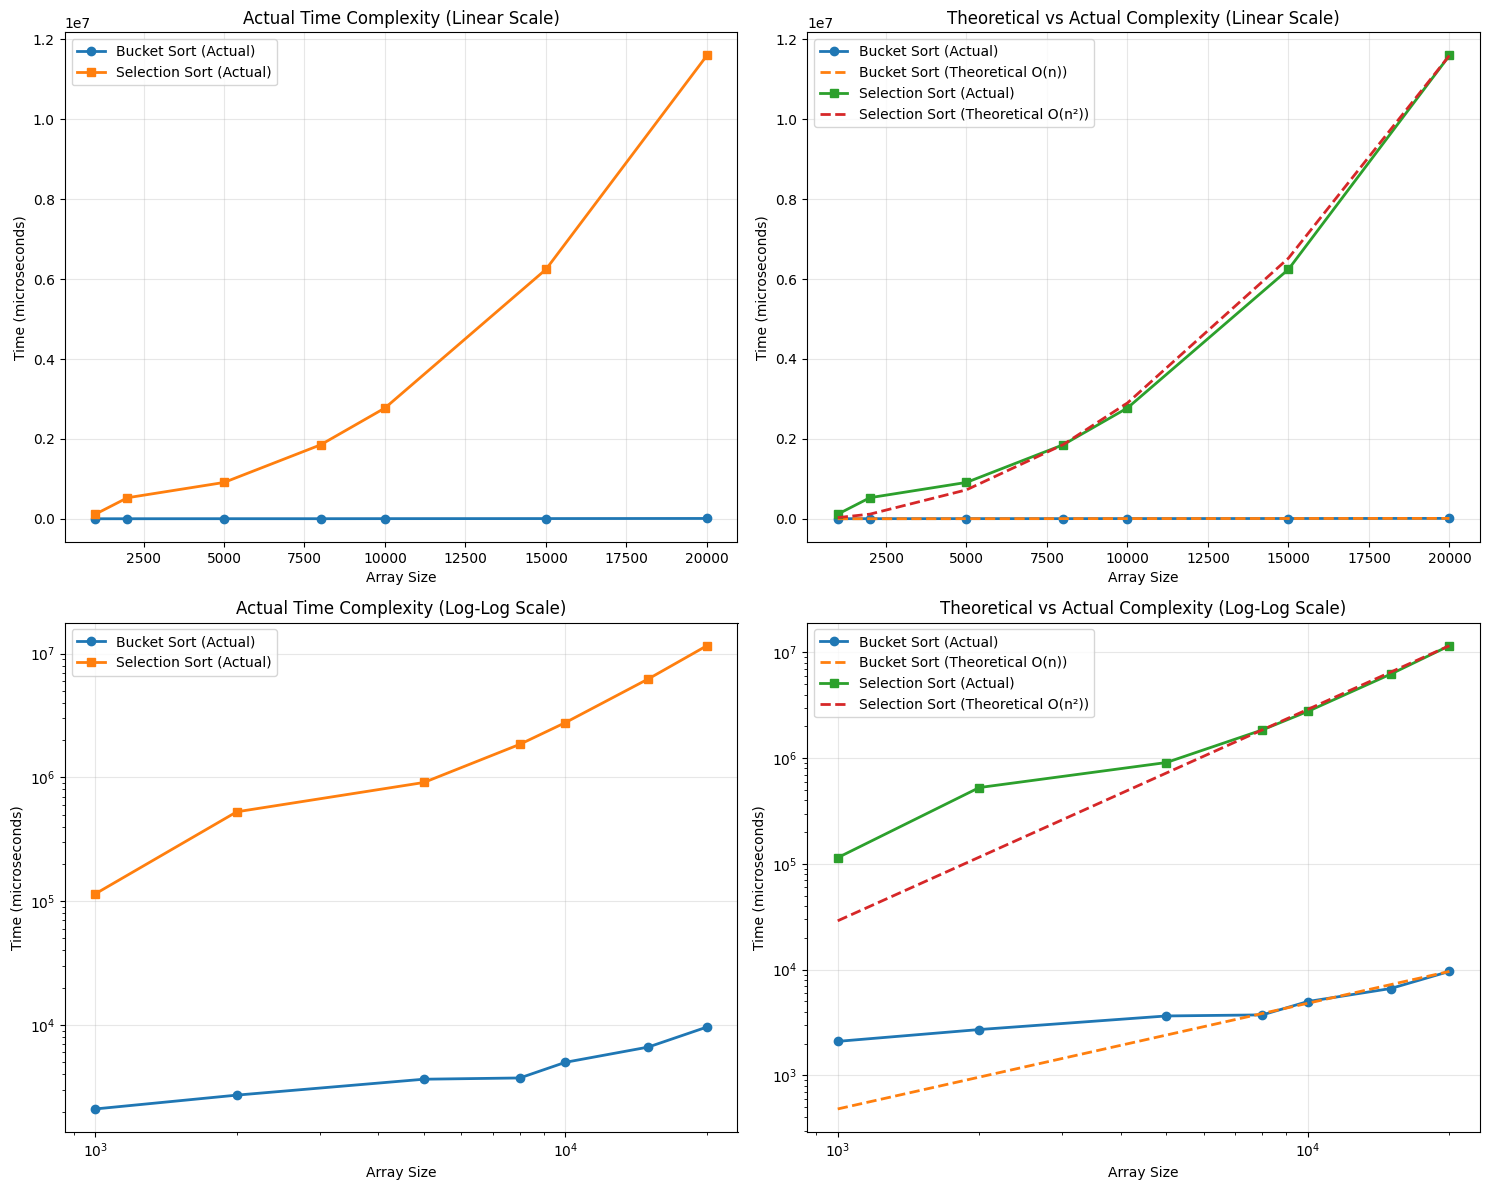

Slope Analysis (Log-Log Plot):
Bucket Sort slope: 0.4552 (Expected: ~1 for O(n))
Selection Sort slope: 1.4115 (Expected: ~2 for O(n²))
STATISTICAL ANALYSIS OF SORTING ALGORITHMS

Growth Ratio Analysis:
Size    Bucket    Bucket Ratio   Selection      Selection Ratio
----------------------------------------------------------------------
2000    2714.5    1.29           527784.4       4.60
5000    3649.6    1.34           910472.9       1.73
8000    3735.6    1.02           1851968.2      2.03
10000   4998.2    1.34           2774106.3      1.50
15000   6633.1    1.33           6243080.0      2.25
20000   9628.7    1.45           11596153.9     1.86

Theoretical vs Actual Growth Analysis:
Bucket Sort correlation with O(n): 0.9800
  → Interpretasi: KORELASI SANGAT KUAT - Pertumbuhan sesuai dengan O(n)
Selection Sort correlation with O(n²): 0.9990
  → Interpretasi: KORELASI SANGAT KUAT - Pertumbuhan sesuai dengan O(n²)

Statistical Significance Tests:
Bucket Sort linear fit - R²: 0.9604, p-

In [3]:
if __name__ == "__main__":
    df = analyze_sorting_algorithms()
    print_table_sorting_algorithms(df)
    plot_complexity_analysis(df)
    print_statistical_analysis(df)